In [1]:
# ******* True running program *******

# Generate the augmentated images and its corresponding bbox coordinates, and write everything in an Excel file.
# This notebook is for validaion set
# This notebook is for Random Translation

### Import necessary packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pydicom as dicom
from PIL import Image, ImageMath
import cv2 
import skimage.color
import os
import random
import pandas as pd
from data_aug.data_aug import *
from data_aug.bbox_util import *
import pickle as pkl

### Prprocessing

In [3]:
# Input original dicom image file path and its corresponding bbox coordinates

file_path_1 = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\20587810_81cd83d2f4d78528_MG_L_ML_ANON.dcm'
bbox_coordinate_1 = [748., 917., 883., 1044., 0.]
file_path_2 = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\50999459_f62fbf38fb208316_MG_L_CC_ANON.dcm'
bbox_coordinate_2 = [860., 1605., 1283., 2060., 0.]
file_path_3 = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\30011674_6968748e66837bc7_MG_L_CC_ANON.dcm'
bbox_coordinate_3 = [585., 933., 854., 1277., 0.]
file_path_4 = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\22678694_61b13c59bcba149e_MG_L_ML_ANON.dcm'
bbox_coordinate_4 = [0., 2207., 308., 2457., 0.]
file_path_5 = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\22580680_fe7d005dcbbfb46d_MG_L_CC_ANON.dcm'
bbox_coordinate_5 = [315., 1038., 455., 1142., 0.]
file_path_6 = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\50996352_6aba0b402889a16f_MG_R_ML_ANON.dcm'
bbox_coordinate_6 = [1864., 1375., 2178., 1696., 0.]
file_path_7 = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\20588680_036aff49b8ac84f0_MG_L_ML_ANON.dcm'
bbox_coordinate_7 = [0., 1033., 798., 1759., 0.]
file_path_8 = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\22614379_d065adcb9905b973_MG_L_CC_ANON.dcm'
bbox_coordinate_8 = [43., 2505., 561., 2902., 0.]
file_path_9 = r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\22580244_5530d5782fc89dd7_MG_R_ML_ANON.dcm'
bbox_coordinate_9 = [1363., 1498., 1513., 1724., 0.]

file_path_array = []
bbox_coordinates_array = np.zeros([9, 5])

# Use eval to put the file path and its corresponding bbox coordinates into array
for x in range(9):
    file_path_temp = 'file_path_{}'.format(x+1)
    bbox_coordinate_temp = 'bbox_coordinate_{}'.format(x+1)
    
    file_path_array.append(eval(file_path_temp))
    bbox_coordinates_array[x, :] = eval(bbox_coordinate_temp)

print(bbox_coordinates_array)

[[ 748.  917.  883. 1044.    0.]
 [ 860. 1605. 1283. 2060.    0.]
 [ 585.  933.  854. 1277.    0.]
 [   0. 2207.  308. 2457.    0.]
 [ 315. 1038.  455. 1142.    0.]
 [1864. 1375. 2178. 1696.    0.]
 [   0. 1033.  798. 1759.    0.]
 [  43. 2505.  561. 2902.    0.]
 [1363. 1498. 1513. 1724.    0.]]


### Random Translation

In [5]:
# Start Random Translation

# Empty dataframe
df = pd.DataFrame() 

# Do random translation three times for each image
number_of_translation_for_each_image = 3
# Final array for storing all bbox coordinates.
bbox_coordinates_array_random_translation_final = np.zeros([9*number_of_translation_for_each_image, 4])
file_path_array_pd = []

# Outter loop for number of transforms done for each image.
for i in range(number_of_translation_for_each_image):
    bbox_coordinates_array_random_translation_temp = np.zeros([9, 4])
    for j in range(9):

        file_path_temp = file_path_array[j]
        bbox_coordinate_temp = np.array([bbox_coordinates_array[j]])

        # Read the dicom image
        original_dicom = dicom.dcmread(file_path_temp)
        original_data = original_dicom.pixel_array
        dicom_image_size = original_data.shape
        print("Processing number ", j, " images...", i, " iteration...")
        print(dicom_image_size)
        print(dicom_image_size[0])

        # Path of the saved augmentated images.
        saving_path = r'D:\Studying\RetinaNet_Project_test_agumentations\validation_augmentations\Random_translation' 
        # This is the sequence number of the dicom image
        saving_folder = '\\'+ file_path_temp.split('\\')[-1][0:-34]
        # If this directory does not exist, create it at first time.
        if not (os.path.exists(saving_path + saving_folder)):
            os.mkdir(saving_path + saving_folder)

        # Use scikit to duplicate the image channel
        three_channel_image = skimage.color.gray2rgb(original_data)
        img_, bboxes_ = RandomTranslate(0.2, diff=True)(three_channel_image.copy(), bbox_coordinate_temp.copy())

        img_translate_temp = img_[:,:,0].copy()
        print(type(img_translate_temp[0,0]))
        image_name = r'\temp_dicom_{}_random_translation_{}.tif'.format(saving_folder[1:], i)
        Image.fromarray(img_translate_temp).save(saving_path + saving_folder + image_name)
        # Save current temp file path to the data frame array
        file_path_array_pd.append(saving_path + saving_folder + image_name)
        bbox_coordinates_array_random_translation_temp[j, :] = [np.int(bboxes_[0,0]), np.int(bboxes_[0,1]), np.int(bboxes_[0,2]), np.int(bboxes_[0,3])]
    bbox_coordinates_array_random_translation_final[9*i: 9*i+9 ,:] = bbox_coordinates_array_random_translation_temp

print(bbox_coordinates_array_random_translation_final)
df = pd.DataFrame(bbox_coordinates_array_random_translation_final)
df['file path'] = file_path_array_pd
print(df)
writer = pd.ExcelWriter('Random_translation.xlsx')
df.to_excel(writer)
writer.save()

Processing number  0  images... 0  iteration...
(3328, 2560)
3328
<class 'numpy.uint16'>
Processing number  1  images... 0  iteration...
(4084, 3328)
4084
<class 'numpy.uint16'>
Processing number  2  images... 0  iteration...
(3328, 2560)
3328
<class 'numpy.uint16'>
Processing number  3  images... 0  iteration...
(3328, 2560)
3328
<class 'numpy.uint16'>
Processing number  4  images... 0  iteration...
(4084, 3328)
4084
<class 'numpy.uint16'>
Processing number  5  images... 0  iteration...
(3328, 2560)
3328
<class 'numpy.uint16'>
Processing number  6  images... 0  iteration...
(4084, 3328)
4084
<class 'numpy.uint16'>
Processing number  7  images... 0  iteration...
(3328, 2560)
3328
<class 'numpy.uint16'>
Processing number  8  images... 0  iteration...
(3328, 2560)
3328
<class 'numpy.uint16'>
Processing number  0  images... 1  iteration...
(3328, 2560)
3328
<class 'numpy.uint16'>
Processing number  1  images... 1  iteration...
(4084, 3328)
4084
<class 'numpy.uint16'>
Processing number  2 

### Test for the correctness of random rotation here

<class 'numpy.uint16'>
<class 'numpy.uint16'>


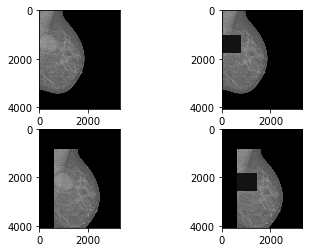

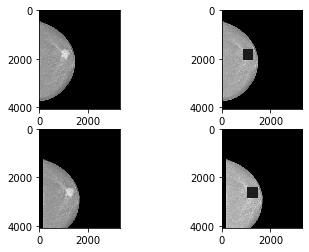

In [8]:
# Choose one to see whether it is correct.
# Status: Pass
# Possible problem: Integer or Float?

translated_image = Image.open(r'D:\Studying\RetinaNet_Project_test_agumentations\validation_augmentations\Random_translation\20588680\temp_dicom_20588680_random_translation_0.tif')
translated_image = np.array(translated_image)
print(type(translated_image[0,1]))
# original_dicom = dicom.dcmread(file_path_array[6])
original_dicom = dicom.dcmread(r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\20588680_036aff49b8ac84f0_MG_L_ML_ANON.dcm')
original_data = original_dicom.pixel_array

plt.figure(1)

# Original image
plt.subplot2grid((2,2), (0,0))
plt.imshow(original_data, cmap='gray')
# Its bbox
plt.subplot2grid((2,2), (0,1))
# cv2.rectangle(original_data, (int(bbox_coordinates_array[6,0]),int(bbox_coordinates_array[6,1])),(int(bbox_coordinates_array[6,2]), int(bbox_coordinates_array[6,3])), (255,0,0), -1)
cv2.rectangle(original_data,(0, 1033),(798, 1759),(255,0,0),-1)
plt.imshow(original_data, cmap='gray')

# Translated image
plt.subplot2grid((2,2),(1,0))
plt.imshow(translated_image, cmap='gray')
# Its bbox
plt.subplot2grid((2,2), (1,1))
# cv2.rectangle(translated_image, (int(bbox_coordinates_array_random_translation_final[6,0]), int(bbox_coordinates_array_random_translation_final[6,1])), (int(bbox_coordinates_array_random_translation_final[6,2]), int(bbox_coordinates_array_random_translation_final[6,3])), (255,0,0), -1)
cv2.rectangle(translated_image, (628, 1835), (1426, 2561), (255,0,0), -1)
plt.imshow(translated_image, cmap='gray')

# ***************** Another Image ********************
translated_image = Image.open(r'D:\Studying\RetinaNet_Project_test_agumentations\validation_augmentations\Random_translation\50999459\temp_dicom_50999459_random_translation_0.tif')
translated_image = np.array(translated_image)
print(type(translated_image[0,1]))
# original_dicom = dicom.dcmread(file_path_array[6])
original_dicom = dicom.dcmread(r'D:\Studying\RetinaNet_Project\all_DICOM_files\AllDICOMs\50999459_f62fbf38fb208316_MG_L_CC_ANON.dcm')
original_data = original_dicom.pixel_array

plt.figure(2)

# Original image
plt.subplot2grid((2,2), (0,0))
plt.imshow(original_data, cmap='gray')
# Its bbox
plt.subplot2grid((2,2), (0,1))
# cv2.rectangle(original_data, (int(bbox_coordinates_array[6,0]),int(bbox_coordinates_array[6,1])),(int(bbox_coordinates_array[6,2]), int(bbox_coordinates_array[6,3])), (255,0,0), -1)
cv2.rectangle(original_data,(860, 1605), (1283, 2060),(255,0,0),-1)
plt.imshow(original_data, cmap='gray')

# Translated image
plt.subplot2grid((2,2),(1,0))
plt.imshow(translated_image, cmap='gray')
# Its bbox
plt.subplot2grid((2,2), (1,1))
# cv2.rectangle(translated_image, (int(bbox_coordinates_array_random_translation_final[6,0]), int(bbox_coordinates_array_random_translation_final[6,1])), (int(bbox_coordinates_array_random_translation_final[6,2]), int(bbox_coordinates_array_random_translation_final[6,3])), (255,0,0), -1)
cv2.rectangle(translated_image, (1043, 2399), (1466, 2854), (255,0,0), -1)
plt.imshow(translated_image, cmap='gray')

In [15]:
a = np.zeros([10,4])
a[1,0] = 1
b = a[0:2,:]
print(b.shape)
print(b[1,0])

(2, 4)
1.0
